# Unüberwachtes Lernen (engl. Unsupervised Learning)

Dieses Notebook ist Teil des Projekts [EmbedML](https://hahn-schickard.de/projekte/embedml) und basiert auf den Inhalten des Kapitels [Unüberwachtes Lernen (engl. Unsupervised Learning)](https://hahn-schickard.gitbook.io/embedml/2_ml/2.5_unueberwachtes_lernen). Es ist auf [Colab](https://colab.research.google.com/drive/1roF4tNy3KvalYCj9zaDn3CbQQjSAXIqb?usp=sharing) und im [GitHub-Repository von Hahn-Schickard](https://github.com/Hahn-Schickard/EmbedML/blob/master/src/Unueberwachtes_Lernen.ipynb) zu finden.

Installation der benötigten Bibliotheken in den angegebenen Versionen.

In [1]:
!pip install scikit-learn==1.5.2 matplotlib==3.8.0 seaborn==0.13.2 pandas==2.2.2 numpy==1.26.4 > /dev/null 2>&1

Das System kann den angegebenen Pfad nicht finden.


Laden der notwendigen Bibliotheken.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans, MeanShift
from sklearn.datasets import load_iris, make_blobs, make_moons
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Clustering Algorithmen

## K-Means Clustering

Der Iris-Datensatz wird aus scikit-learn geladen und die Merkmale in `X` und die Zielwerte in `y` geschrieben.

In [3]:
# Laden des Iris-Datensatzes aus scikit-learn
iris = load_iris()

# Extrahieren der Merkmale (X) und Zielwerte (y) aus dem Iris-Datensatz
X,y = iris.data, iris.target

Der Plot im folgenden ist ein Pairplot, der die Iris-Daten visuell darstellt. Jeder Punkt im Scatterplot repräsentiert eine Iris-Blume und zeigt die Beziehungen zwischen allen Merkmalspaaren, wie Sepal-Länge, Sepal-Breite, Petal-Länge und Petal-Breite. Die Punkte sind farblich nach Spezies (setosa, versicolor, virginica) unterteilt, wodurch man die Unterscheidbarkeit der Arten in Bezug auf die Merkmale erkennen kann. Die Diagonalen enthalten Histogramme, die die Verteilung jedes einzelnen Merkmals für die verschiedenen Spezies zeigen. Dies ermöglicht eine einfache und intuitive Analyse der Datenverteilungen und der Korrelationen zwischen den Merkmalen.

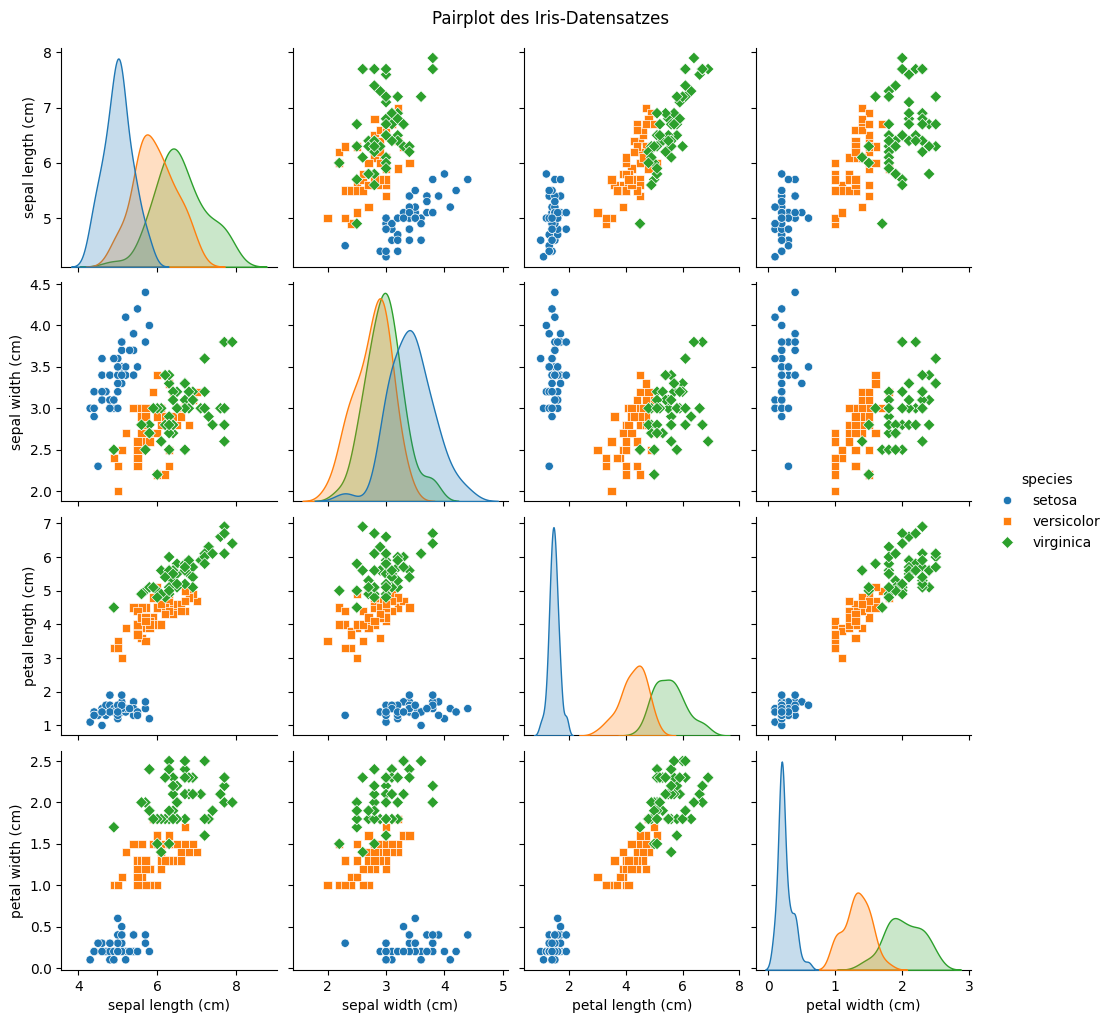

In [4]:
# Erstellen eines Pandas DataFrame aus den Merkmalen und Zielwerten
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = y

# Zuordnung der Zielwerte zu den entsprechenden Speziesnamen
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species'] = iris_df['species'].map(species_mapping)

# Pairplot der Iris-Daten
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])

# Plot anzeigen
plt.suptitle("Pairplot des Iris-Datensatzes", y=1.02)
plt.show()

Dieser Code führt K-Means-Clustering auf den Iris-Daten durch, wobei drei Cluster gebildet werden. Nachdem das Modell auf die Merkmale `X` trainiert wurde, werden die Clusterzuweisungen für jedes Datenpunkt vorhergesagt und in `y_kmeans` gespeichert.

In [5]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=32)
kmeans.fit(X)

# Clusterzuweisungen
y_kmeans = kmeans.predict(X)

Hier wird `y_kmeans` anstelle der Zielwerte (y) für die Einfärbung im Pairplot verwendet, wodurch die visualisierten Gruppierungen durch den K-Means-Algorithmus bestimmt werden.

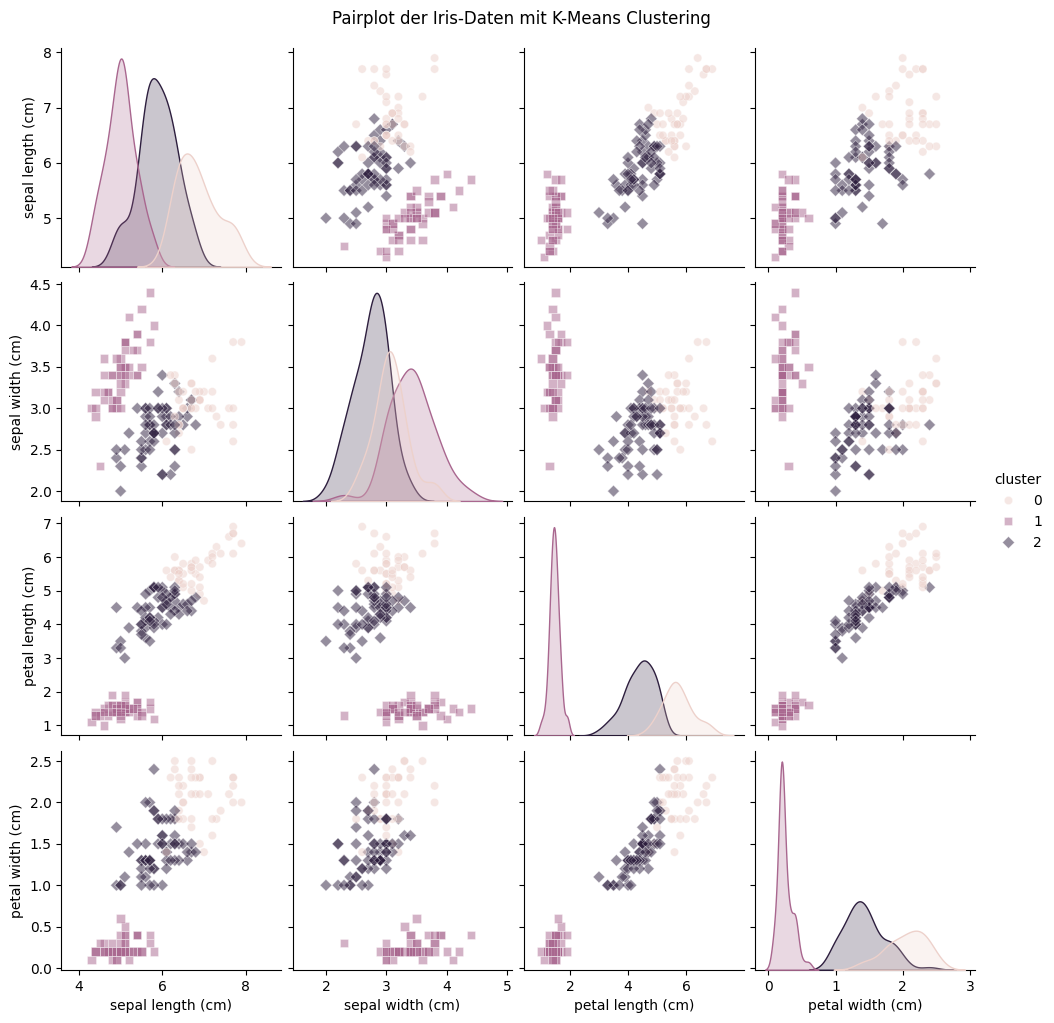

In [6]:
# Erstellen eines Pandas DataFrame aus den Merkmalen und den K-Means-Clusterzuweisungen
iris_km = pd.DataFrame(data=X, columns=iris.feature_names)
iris_km['cluster'] = y_kmeans

# Pairplot der Iris-Daten mit K-Means Clustering-Ergebnissen
sns.pairplot(iris_km, hue='cluster', markers=["o", "s", "D"], plot_kws={'alpha':0.5})

# Plot anzeigen
plt.suptitle("Pairplot der Iris-Daten mit K-Means Clustering", y=1.02)
plt.show()

## Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

500 Beispieldatenpunkte werden mit geringem Rauschen (0.1) erzeugt. Hierfür wird die `make_moons`-Funktion aus scikit-Learn verwendet.

In [7]:
X, _ = make_moons(n_samples=500, noise=0.1, random_state=42)

Die generierten Beispieldaten werden visualisiert. Jeder Punkt im Scatterplot repräsentiert einen Datenpunkt mit zwei Merkmalen (Feature 1 und Feature 2).

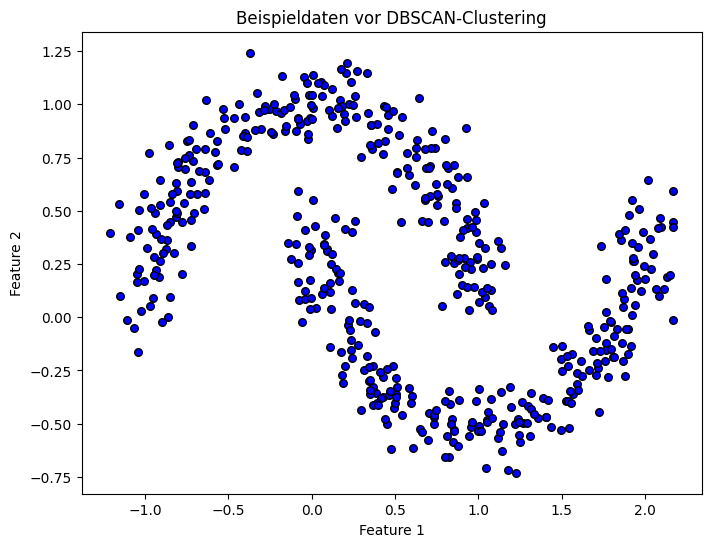

In [8]:
# Plot der Beispieldaten vor dem Clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=30, edgecolor='k')
plt.title('Beispieldaten vor DBSCAN-Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Das DBSCAN-Clustering wird auf den generierten Beispieldaten (`X`) angewendet, mit den Parametern `eps=0.2` für die maximale Distanz zwischen zwei Punkten und `min_samples=10` für die Mindestanzahl von Punkten in einem Nachbarschaftsbereich, um einen Kernpunkt zu definieren. Die Cluster-Zuweisungen werden dann in `labels` gespeichert.

In [9]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan.fit(X)

# Cluster-Zuweisungen
labels = dbscan.labels_

Dieser Abschnitt des Codes identifiziert die Kernpunkte (Core Samples) im DBSCAN-Clustering-Ergebnis. Zuerst wird eine Maske (`core_samples_mask`) erstellt, die alle Punkte im Datensatz markiert, die als Kernpunkte identifiziert wurden. Diese werden aus den `core_sample_indices_` des DBSCAN-Objekts abgerufen. Anschließend werden die tatsächlichen Kernpunkte (`core_samples`) aus den Beispieldaten `X` extrahiert, und ihre Cluster-Zuweisungen werden in `core_samples_labels` gespeichert.

In [10]:
# Erstelle eine Maske für Kernpunkte, initialisiert mit False für alle Punkte
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)

# Setze True für die Indizes der Kernpunkte basierend auf core_sample_indices_
core_samples_mask[dbscan.core_sample_indices_] = True

# Extrahiere die tatsächlichen Kernpunkte aus den Beispieldaten X
core_samples = X[core_samples_mask]

# Erhalte die Cluster-Zuweisungen für die Kernpunkte
core_samples_labels = labels[core_samples_mask]

Im Anschluss wird ein Plot der generierten Beispieldaten nach der Anwendung des DBSCAN-Clustering-Algorithmus generiert. Es ist zu erkennen, dass die zwei Cluster korrekt gebildet werden.

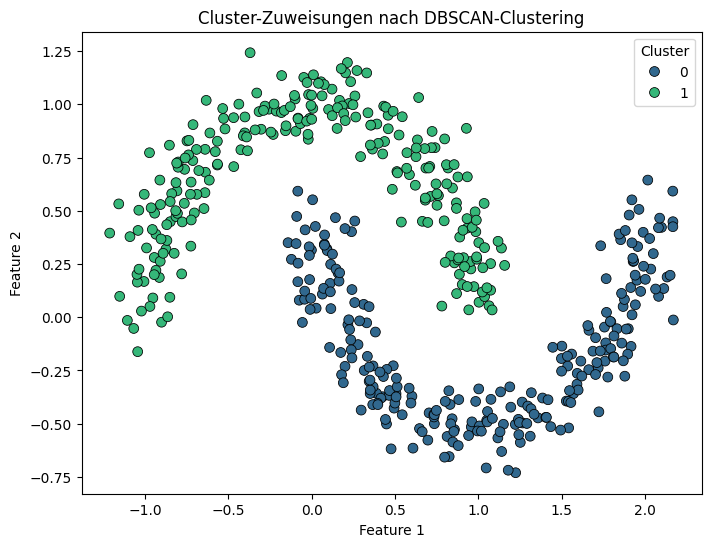

In [11]:
# Plot der Cluster-Zuweisungen nach DBSCAN-Clustering mit Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=50, edgecolor='k')
plt.title('Cluster-Zuweisungen nach DBSCAN-Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

## Mean Shift Clustering

Es werden 300 Beispieldatenpunkte generiert, die aus vier gut separierbaren Clustern bestehen, wobei jedes Cluster eine Standardabweichung (`cluster_std`) von 0.40 aufweist. Die Generierung der Daten ist aufgrund des angegebenen `random_state`-Werts reproduzierbar.

In [12]:
# Generiere Beispieldaten
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.40, random_state=0)

Dieser Plot zeigt die Beispieldaten vor der Anwendung des Mean Shift Clustering-Algorithmus. Die Punkte im Scatterplot sind in blauer Farbe dargestellt und repräsentieren jeden Datenpunkt mit seinen zwei Merkmalen (Feature 1 und Feature 2).

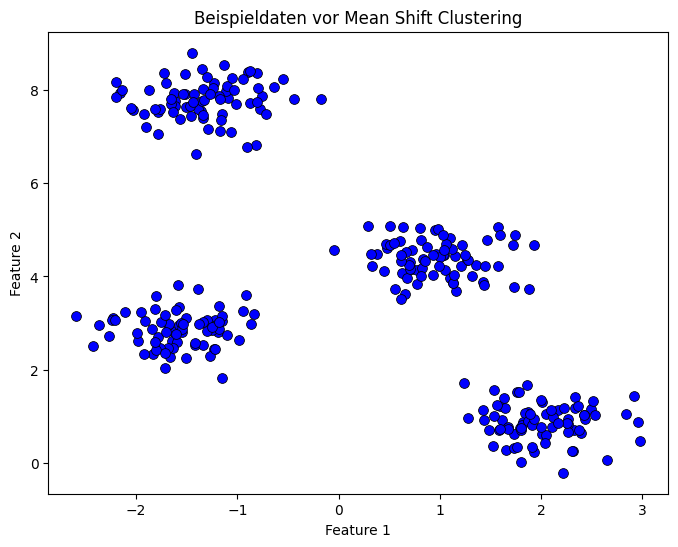

In [13]:
# Plot der Beispieldaten vor dem Clustering mit Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], color='blue', s=50, edgecolor='k')
plt.title('Beispieldaten vor Mean Shift Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Das Mean Shift Clustering wird auf den vorher generierten Beispieldaten `X` angewendet. Der Mean Shift Algorithmus verwendet eine Bandbreite (`bandwidth`) von 0.8 für die Dichteschätzung. Nach dem Clustering werden die gefundenen Cluster-Zentren in `centers` gespeichert und die Cluster-Zuweisungen für jeden Datenpunkt in `labels`.

In [14]:
# Mean Shift Clustering
mean_shift = MeanShift(bandwidth=0.8)
mean_shift.fit(X)

# Cluster-Zentren
centers = mean_shift.cluster_centers_

# Cluster-Zuweisungen
labels = mean_shift.labels_

Die Ergebnisse des Mean Shift Clustering-Algorithmus werden visualisiert. Die Punkte im Scatterplot sind nach ihren Cluster-Zuweisungen eingefärbt, wobei eine Farbpalette (viridis) verwendet wird. Die Cluster werden anhand von Mean Shift Clustering richtig erkannt.

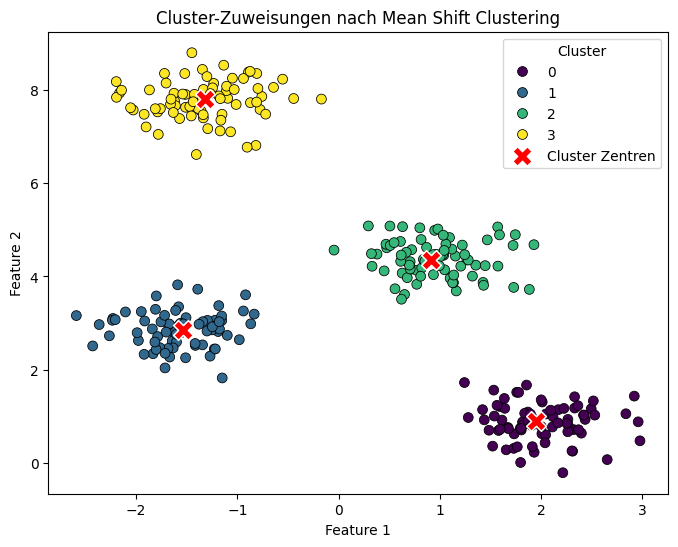

In [15]:
# Plot der Cluster-Zuweisungen nach Mean Shift Clustering mit Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=50, edgecolor='k')
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], color='red', marker='X', s=200, label='Cluster Zentren')
plt.title('Cluster-Zuweisungen nach Mean Shift Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

## Dimensionsreduktion

## Principal Component Analysis (PCA)

Der Iris-Datensatz wird aus scikit-learn geladen und die Merkmale in `X` und die Zielwerte in `y` geschrieben.

In [16]:
# Laden des Iris-Datensatzes
iris = load_iris()

# Trainingsdaten und -label definieren
X, y = iris.data, iris.target

In diesem Plot werden Iris-Daten visualisiert. Jeder Punkt im Scatterplot repräsentiert einen Datenpunkt mit den ersten beiden Merkmalen (Feature 1 und Feature 2). Die Punkte sind nach den verschiedenen Spezies (Iris-Arten) eingefärbt.
In dem Plot lassen sich die Verteilung und die schwierige Trennbarkeit der Iris-Datenpunkte anhand der ersten beiden Merkmale erkennen.

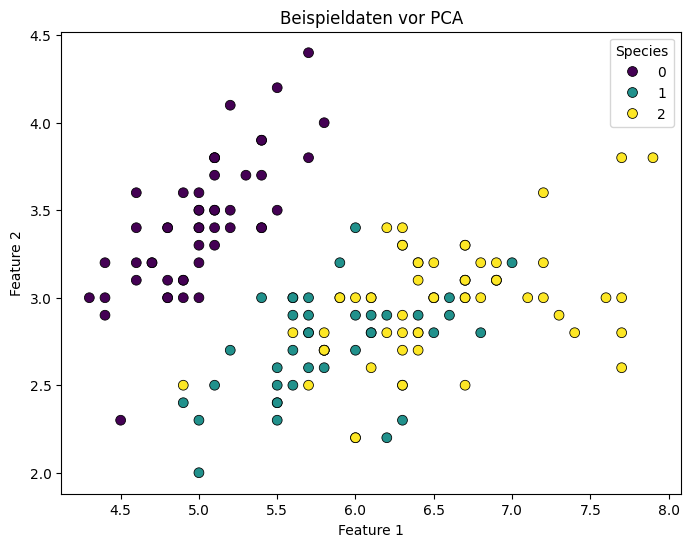

In [17]:
# Plot der Beispieldaten vor der PCA mit Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=50, edgecolor='k')
plt.title('Beispieldaten vor PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Species', loc='upper right')
plt.show()

Auf den Iris-Daten wird eine PCA (Principal Component Analysis) durchgeführt, wobei die Anzahl der Hauptkomponenten auf 2 festgelegt wird. Die transformierten Daten werden in `X_r` gespeichert, wobei die PCA die ursprünglichen Merkmale in eine neue Basis transformiert, die durch die ersten beiden Hauptkomponenten definiert wird.

In [18]:
# PCA mit 2 Hauptkomponenten
pca = PCA(n_components=2,random_state=0)
# Führt PCA mit 3 Hauptkomponenten auf den Datensatz X durch und speichert die transformierten Daten in X_r
X_r = pca.fit_transform(X)

Dieser Plot visualisiert die Daten nach Anwendung der PCA mit zwei Hauptkomponenten. Jeder Punkt im Scatterplot repräsentiert einen Datenpunkt im neuen zweidimensionalen Raum, der durch die ersten beiden Hauptkomponenten definiert ist (Principal Component 1 und Principal Component 2). Die Punkte sind nach den verschiedenen Iris-Arten eingefärbt.
Man kann sehen, wie gut die Reduktion auf zwei Hauptkomponenten die Klassenunterscheidung in den transformierten Daten unterstützt, wobei die Achsen nun die Hauptkomponenten anstelle der ursprünglichen Merkmale darstellen.

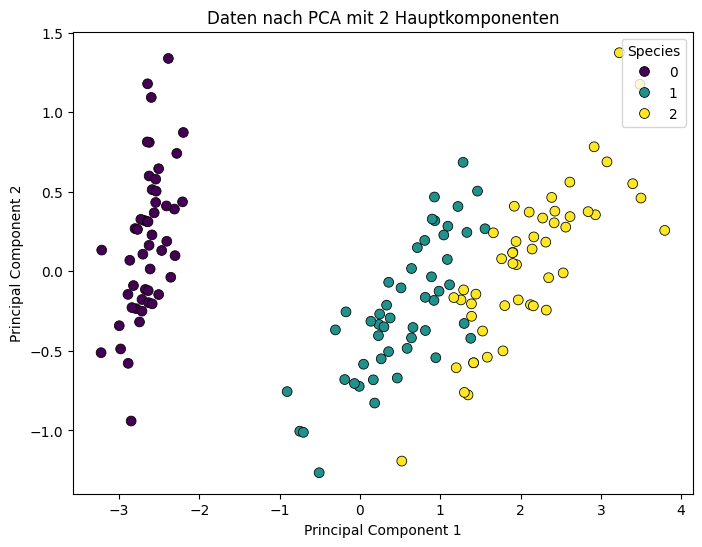

In [19]:
# Plot der transformierten Daten nach PCA mit Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_r[:, 0], y=X_r[:, 1], hue=y, palette='viridis', s=50, edgecolor='k')
plt.title('Daten nach PCA mit 2 Hauptkomponenten')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species', loc='upper right')
plt.show()

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

Der Iris-Datensatz wird aus scikit-learn geladen und die Merkmale in `X` und die Zielwerte in `y` geschrieben.

In [20]:
# Laden des Iris-Datensatzes
iris = load_iris()

# Trainingsdaten und -label definieren
X, y = iris.data, iris.target

In diesem Plot werden Iris-Daten visualisiert. Jeder Punkt im Scatterplot repräsentiert einen Datenpunkt mit den ersten beiden Merkmalen (Feature 1 und Feature 2). Die Punkte sind nach den verschiedenen Spezies (Iris-Arten) eingefärbt.
In dem Plot lassen sich die Verteilung und die schwierige Trennbarkeit der Iris-Datenpunkte anhand der ersten beiden Merkmale erkennen.

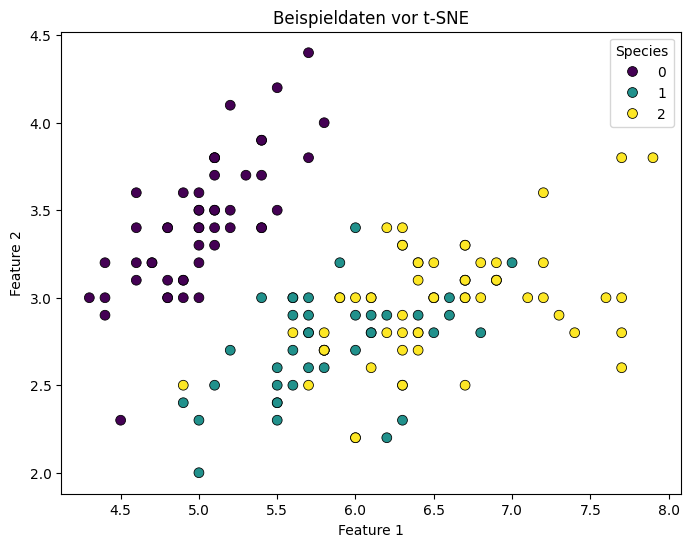

In [21]:
# Plot der Beispieldaten vor der t-SNE mit Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=50, edgecolor='k')
plt.title('Beispieldaten vor t-SNE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Species', loc='upper right')
plt.show()

Dieser Code führt t-SNE auf den gegebenen Daten X aus, wobei eine Reduktion auf 2 Dimensionen stattfindet. Die transformierten Daten werden in `X_2d` gespeichert, nachdem die t-SNE-Transformation unter Verwendung eines festgelegten Zufallszustands (`random_state=0`) durchgeführt wurde.

In [22]:
# t-SNE mit 2 Dimensionen
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

Der Plot zeigt die Daten nach der Anwendung von t-SNE mit 2 Dimensionen. Jeder Punkt im Scatterplot repräsentiert einen Datenpunkt im neuen zweidimensionalen Raum, der durch die t-SNE-Dimensionen 1 und 2 definiert ist. Die Punkte sind nach den verschiedenen Iris-Arten (Spezies) eingefärbt. Man sollte erkennen können, wie gut die t-SNE die Datenpunkte so transformiert hat, dass ähnliche Datenpunkte in dem transformierten Raum nahe beieinander liegen und verschiedene Klassen gut separiert sind.

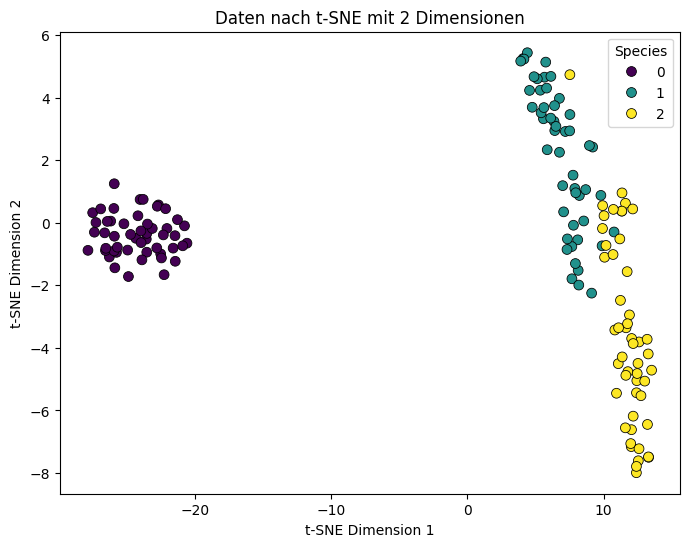

In [23]:
# Plot der transformierten Daten nach t-SNE mit Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y, palette='viridis', s=50, edgecolor='k')
plt.title('Daten nach t-SNE mit 2 Dimensionen')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Species', loc='upper right')
plt.show()